In [2]:
# Importing all the packages
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import argparse
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.metrics import f1_score

In [3]:
# Define arg parser
seed=200
paser = argparse.ArgumentParser() 
args = paser.parse_args("")
np.random.seed(200)

### Training Part:

- In this part we are going to train the weak Classifier of The adaboost to the given training Data. In the next code block I am going to write a function which taken inputs from the given text file and returns the data frame containg X and Y parameters.

In [4]:
# Enter the data file to train
def file_input():
    return input("Enter the File name") or 'multilabel_train_data.txt'
    #return input("Enter File Name")

In [5]:
# Function to find total number of features
def tot_f(data,y):
    # Find the total number of features present and store the labels
    feature_tot=0
    for line in data:
       parts=line.strip().split()
       #print(parts)
       labels=[]
       for part in parts:
        if ',' in part or ':' not in part:
            if ',' in part:
                labels=part.strip().split(',')
                labels=[int(i) for i in labels]
                y.append(labels)
            else:
                labels=[int(part)]
                y.append(labels)
        if ':' in part:
            temp=part.strip().split(':')
            feature_tot=max(feature_tot,int(temp[0]))
    print("Total number of features present :",feature_tot)
    print("Length of  y :",len(y))
    print("\nLabels :",y)
    return feature_tot,y


In [6]:
# Function to find the max_number of classes
def max_cls(y):
    max_class=0
    for i in y:
        max_class=max(max_class,max(i))
    print('Total number of classes :',max_class)
    return max_class

In [7]:
# Encode the variables
def encode(y,max_class):
    # Encode the variables
    temp=[]
    for i in y:
        A=np.zeros(max_class)
        for j in i:
           A[j-1]=1
        temp.append(A)
    temp=np.array(temp)
    y=temp
    print("Encoded labels :",y)
    return y


In [8]:
# Function to return the features of variables
def X_features(data,feature_tot,X):
    # Parse each line of the file and store in X and y arrays
    for line in data:
        # Split the line by space characters
        parts = line.strip().split()
    
        # The remaining parts are the features
        features = np.zeros(feature_tot)
        for part in parts:
           if ':' in part:
             # Split each feature by ':' character
             id, val = part.split(':')
             # Store the feature value in the dictionary
             features[int(id)-1] = float(val)    
        # Append the feature dictionary to X array
        X.append(features)
    X=np.array(X)
    print(X)
    return X

In [9]:
# Take Input and return X and Y
def f_L():
    train_file=file_input()
    data=[]
    with open(f'{train_file}', 'r') as f:
        data=f.readlines()
    # Initialize the feature and labels
    X=[]
    y=[]
    feature_tot,y=tot_f(data,y)
    max_cl=max_cls(y)
    y=encode(y,max_cl)
    X=X_features(data,feature_tot,X)
    return X,y
    

In [10]:
X_train,Y_train=f_L()
X_val,Y_val=f_L()

Total number of features present : 103
Length of  y : 1500

Labels : [[6, 7, 11, 12], [3, 4, 11, 12], [4, 5, 6, 7, 10, 11, 12], [1, 2, 9, 10], [1, 2, 11, 12], [0, 1], [0, 1, 11, 12], [2, 3, 4, 13], [2, 3, 11, 12], [3, 4, 11, 12], [9, 10, 11, 12], [7, 8], [2, 3, 11, 12, 13], [4, 5], [3, 4, 11, 12], [3, 4, 11, 12], [2, 3, 6, 7, 11, 12], [0, 1, 11, 12], [4, 5, 11, 12], [2, 3, 11, 12], [0, 1, 4, 5], [0, 1], [4, 5, 6, 7, 11, 12], [6, 7, 8, 9], [4, 5, 7, 8, 11, 12], [0, 1, 11, 12], [0, 1], [2, 3, 11, 12], [2, 3, 11, 12], [1, 2, 4, 5, 11, 12], [0, 1, 2, 3, 4, 11, 12], [2, 3, 11, 12, 13], [7, 8], [1, 2, 11, 12], [4, 5], [0, 1, 7, 8], [6, 7, 11, 12], [1, 2, 7, 8, 11, 12], [2, 3, 11, 12], [1, 2, 3, 11, 12], [0, 11, 12], [2, 3, 11, 12], [1, 2], [4, 5, 6, 7, 11, 12], [2, 3, 11, 12], [0, 11, 12], [1, 2, 3], [0, 1, 2, 11, 12], [1, 2, 3, 11, 12], [2, 3, 4, 11, 12, 13], [5, 6, 7], [5, 6, 7, 11, 12], [4, 5, 11, 12], [3, 4, 11, 12], [4, 5], [1, 2, 6, 7, 11, 12], [4, 5, 11, 12], [5, 6, 7, 10, 11, 12], [3

- Encode the labels into one hot variables. This we we can represent multi-class labels. The labels belonging to the datapoint are 1 rest are 0.

- Extract the feature values for all the datapoints.

- From the above codes we have obtained the feautures and the labels. Now I will be applying adaboost algorithm to predict the labels.

- For the weak Classifier I will be testing various Base weak learners such as Decision trees, SVC and other methods and choosing the best weak learner out of them for the adaboost model.

### START OF TRAINING

In [11]:
args.epoch_num=int(input("Enter the number of Epochs"))
 
def calculate_mult(y_true,y_pred):
      temp=[]
      for i in range(y_true.shape[0]):
         #print(y_true[0].shape[0])
         c=np.sum(y_true[i]==y_pred[i])/y_true[i].shape[0]

         if(c>0.8):
            temp.append(1)
         else:
            temp.append(-1)
      
         #temp.append(c-1)
      return(np.array(temp))

class AdaboostMH:
  def __init__(self, args):
    self.epoch_num = args.epoch_num
    #self.class_num = max_class
    self.alpha = np.zeros(self.epoch_num)
    self.clfs = []
    self.result = []
    self.args = args

  def accuracy(self,y_true,y_pred):
    acc=0
    for i in range(y_true.shape[0]):
       acc += np.sum(y_true[i]==y_pred[i]) / y_pred[i].shape[0]
    return acc/y_true.shape[0]
  
  def F_1(self,y_true,y_pred):
    acc=0
    for i in range(y_true.shape[0]):
       acc += f1_score(y_true,y_pred,average='micro')
    return acc/y_true.shape[0]
  
  
  def train(self,X,Y,x_val,y_val):
    # Define the initial weights as 1/(Number of Datapoints)
    # In the beginning everypoint has same weight
    self.train_set_len = X.shape[0]
    self.D = np.ones(self.train_set_len) / self.train_set_len   
    best_acc=0
    final_model=0
    depth=0
    for j in range(1,18):    
     for i in range(self.epoch_num):
      clf = DecisionTreeClassifier(criterion='gini',max_depth=j)
      # Define weak learner
      clf.fit(X,Y, sample_weight=self.D)  # Here we are providing sample weights to the decision tree 
      predicted = clf.predict(X) # Get the predicted vector
      val_predicted=clf.predict(x_val)
      #print(predicted)
      if (best_acc<self.accuracy(y_val,val_predicted)):
          best_acc=self.accuracy(y_val,val_predicted)
          final_model=clf
          depth=j
      
      print(f" Training Accuracy for Epoch {i}",self.accuracy(Y,predicted))
      print(f" Validation Accuracy for Epoch {i}",self.accuracy(y_val,val_predicted))
      print(f" F_1 Score for Epoch {i}",self.F_1(y_val,val_predicted))

      r = np.sum(self.D *calculate_mult(Y,predicted)) # Y * predicted
      print(r)
      
      # calculate the new value of alpha
      a = 0.5 * np.log((1 + r) / (1 - r)) 
      self.alpha[i] = a
      self.clfs.append(clf)
      
      # Reinitialize the weights 
      self.D = self.D * np.exp(-a *calculate_mult(Y,predicted))#* Y * predicted)
      sum = np.sum(self.D)
      #self.D = self.D / sum
      print(self.D)
    print("Best Accuracy :",best_acc)
    print("Best Hyperparameter :",depth)
    # Save the best model in pkl format 
    filename = 'IE506_22M1674_CHALLENGE_MODEL.pkl'
    pickle.dump(final_model, open(filename, 'wb'))

model=AdaboostMH(args)
model.train(X_train,Y_train,X_val,Y_val)
    

 Training Accuracy for Epoch 0 0.757846153846149
 Validation Accuracy for Epoch 0 0.7507692307692311
 F_1 Score for Epoch 0 0.48407643312101906
-0.096
[0.00073406 0.00073406 0.00060546 ... 0.00073406 0.00060546 0.00073406]
 Training Accuracy for Epoch 1 0.7583589743589696
 Validation Accuracy for Epoch 1 0.7446153846153849
 F_1 Score for Epoch 1 0.4779874213836483
-0.0017253019267476199
[0.00073532 0.00073532 0.00060442 ... 0.00073532 0.00060442 0.00073532]
 Training Accuracy for Epoch 2 0.7583589743589696
 Validation Accuracy for Epoch 2 0.7446153846153849
 F_1 Score for Epoch 2 0.4779874213836483
-7.968605274366776e-06
[0.00073533 0.00073533 0.00060441 ... 0.00073533 0.00060441 0.00073533]
 Training Accuracy for Epoch 3 0.7583589743589696
 Validation Accuracy for Epoch 3 0.7446153846153849
 F_1 Score for Epoch 3 0.4779874213836483
-3.6816241269152505e-08
[0.00073533 0.00073533 0.00060441 ... 0.00073533 0.00060441 0.00073533]
 Training Accuracy for Epoch 4 0.7583589743589696
 Validati

### PLOTTING:

- Here I am plotting for the best parameter.

In [43]:
def train_1(X,Y,x_val,y_val):
    # Define the initial weights as 1/(Number of Datapoints)
    # In the beginning everypoint has same weight
    train_set_len = X.shape[0]
    D = np.ones(train_set_len) / train_set_len   
    best_acc=0
    final_model=0
    depth=0
    temp_acc_val=[]
    temp_acc_train=[]
    temp_F_1_val=[]
    temp_F_1_train=[]
    for i in range(100):
      clf = DecisionTreeClassifier(criterion='gini',max_depth=5)
      # Define weak learner
      clf.fit(X,Y, sample_weight=D)  # Here we are providing sample weights to the decision tree 
      predicted = clf.predict(X) # Get the predicted vector
      val_predicted=clf.predict(x_val)
      #print(predicted)
      if (best_acc<model.accuracy(y_val,val_predicted)):
          best_acc=model.accuracy(y_val,val_predicted)
          final_model=clf
      
      print(f" Training Accuracy for Epoch {i}",model.accuracy(Y,predicted))
      print(f" Validation Accuracy for Epoch {i}",model.accuracy(y_val,val_predicted))
      print(f" F_1 Score for Epoch {i}",model.F_1(y_val,val_predicted))

      temp_acc_train.append(model.accuracy(Y,predicted))
      temp_acc_val.append(model.accuracy(y_val,val_predicted))
      temp_F_1_train.append(model.F_1(Y,predicted))
      temp_F_1_val.append(model.F_1(y_val,val_predicted))

      r = np.sum(D *calculate_mult(Y,predicted)) # Y * predicted
      print(r)
      
      # calculate the new value of alpha
      a = 0.5 * np.log((1 + r) / (1 - r)) 
      #alpha[i] = a
      #clfs.append(clf)
      
      # Reinitialize the weights 
      D = D * np.exp(-a *calculate_mult(Y,predicted))#* Y * predicted)
      sum = np.sum(D)
      #D = D / sum
      print(D)
    return temp_acc_train,temp_acc_val,temp_F_1_train,temp_F_1_val

In [44]:
temp_acc_train,temp_acc_val,temp_F_1_train,temp_F_1_val=train_1(X_train,Y_train,X_val,Y_val)

 Training Accuracy for Epoch 0 0.7879999999999909
 Validation Accuracy for Epoch 0 0.7569230769230773
 F_1 Score for Epoch 0 0.5561797752808991
-0.07600000000000001
[0.00061779 0.00071941 0.00061779 ... 0.00071941 0.00061779 0.00071941]
 Training Accuracy for Epoch 1 0.7879999999999909
 Validation Accuracy for Epoch 1 0.7569230769230773
 F_1 Score for Epoch 1 0.5561797752808991
7.719519468096792e-17
[0.00061779 0.00071941 0.00061779 ... 0.00071941 0.00061779 0.00071941]
 Training Accuracy for Epoch 2 0.7879999999999909
 Validation Accuracy for Epoch 2 0.7569230769230773
 F_1 Score for Epoch 2 0.5561797752808991
3.469446951953614e-17
[0.00061779 0.00071941 0.00061779 ... 0.00071941 0.00061779 0.00071941]
 Training Accuracy for Epoch 3 0.7879999999999909
 Validation Accuracy for Epoch 3 0.7569230769230773
 F_1 Score for Epoch 3 0.5561797752808991
3.469446951953614e-17
[0.00061779 0.00071941 0.00061779 ... 0.00071941 0.00061779 0.00071941]
 Training Accuracy for Epoch 4 0.7879999999999909

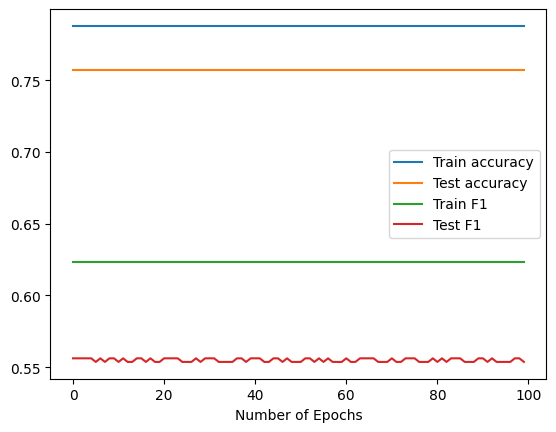

In [51]:
ep=[i for i in range(100)]
plt.plot(ep,temp_acc_train,label='Train accuracy')
plt.plot(ep,temp_acc_val,label='Test accuracy')
plt.plot(ep,temp_F_1_train,label='Train F1')
plt.plot(ep,temp_F_1_val,label='Test F1')
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

### COMMENTS :
- From the above we can see that the best accuracy has come out to be around 0.77% and the Hyperpaprameter chosen best is 5.

### TESTING PART

- Just enter the required dataset name when asked and it will print the accuracy and F1 values

In [11]:
# Prepare the dataset
X_test,Y_test=f_L()

Total number of features present : 103
Length of  y : 50

Labels : [[0, 11, 12], [3, 4, 11, 12], [4, 5], [2, 3, 9, 10, 11, 12], [0, 11, 12], [2, 3, 11, 12], [6, 7, 11, 12], [1, 2, 4, 5], [2, 3, 11, 12], [4, 5], [2, 3, 11, 12], [0, 1, 11, 12], [0, 1, 11, 12], [4, 5, 11, 12], [2, 3, 9, 10], [2, 3, 11, 12], [1, 2, 11, 12], [3, 4, 11, 12], [5, 6, 10, 11], [0, 1, 4, 5, 11, 12], [3, 4, 11, 12], [9, 10], [4, 5, 11, 12], [0], [2, 3, 11, 12, 13], [2, 3, 11, 12], [4, 5, 11, 12], [3, 4, 11, 12], [0], [0, 1], [0, 1, 5, 6, 7, 8, 9, 11, 12], [9, 10, 11, 12], [1, 2], [5, 6, 7, 11, 12], [2, 3, 4, 5, 11, 12], [1, 2, 3, 6, 7, 11, 12], [2, 3, 4, 5, 11, 12], [2, 3, 11, 12], [3, 4, 11, 12], [2, 3, 4, 5], [0, 1, 5, 6, 10, 11], [9, 10, 11, 12], [2, 3, 11, 12], [4, 5], [1, 2, 3, 4, 5, 9, 10, 11, 12], [4, 5, 6, 7, 11, 12], [0, 1], [0, 1, 5, 6, 7, 10, 11, 12], [2, 3, 11, 12], [5, 6, 7, 11, 12]]
Total number of classes : 13
Encoded labels : [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0

In [16]:
# Load the pkl model 
loaded_model = pickle.load(open('IE506_22M1674_CHALLENGE_MODEL.pkl', 'rb'))

c:\Users\kanad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
def accuracy(y_true,y_pred):
    acc=0
    for i in range(y_true.shape[0]):
       acc += np.sum(y_true[i]==y_pred[i]) / y_pred[i].shape[0]
    return acc/y_true.shape[0]
  
def F_1(y_true,y_pred):
    acc=0
    for i in range(y_true.shape[0]):
       acc += f1_score(y_true,y_pred,average='micro')
    return acc/y_true.shape[0]

In [18]:
pred_test=loaded_model.predict(X_test)
print("\nAccuracy on the given Test Set :",accuracy(Y_test,pred_test))
print("\nF1 on the given Test Set :",F_1(Y_test,pred_test))


Accuracy on the given Test Set : 0.7707692307692311

F1 on the given Test Set : 0.5940054495912799
